In [12]:
import os
import sys
import argparse
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import gaussian_kde


In [13]:
ds_alpha = xr.open_dataset('/home/TLR/data/datasets/results_lorenz_chaotic/lorenz_chaotic_alphat_max1760_0.99_50_0.nc')

alphat = ds_alpha['alphat'].values
print(alphat.shape)

(11, 99999)


In [7]:
ds_alpha['lag']

<xarray.DataArray 'lag' (lag: 11)>
array([   1,    2,    3,    4,    5,  110,  220,  440,  660,  880, 1760])
Coordinates:
  * lag      (lag) int64 1 2 3 4 5 110 220 440 660 880 1760

In [9]:
ds_alpha['alphat'].sel(lag=1760).values

array([0.024, 0.024, 0.022, ...,   nan,   nan,   nan])

Text(0.51, 0.294, '(f)')

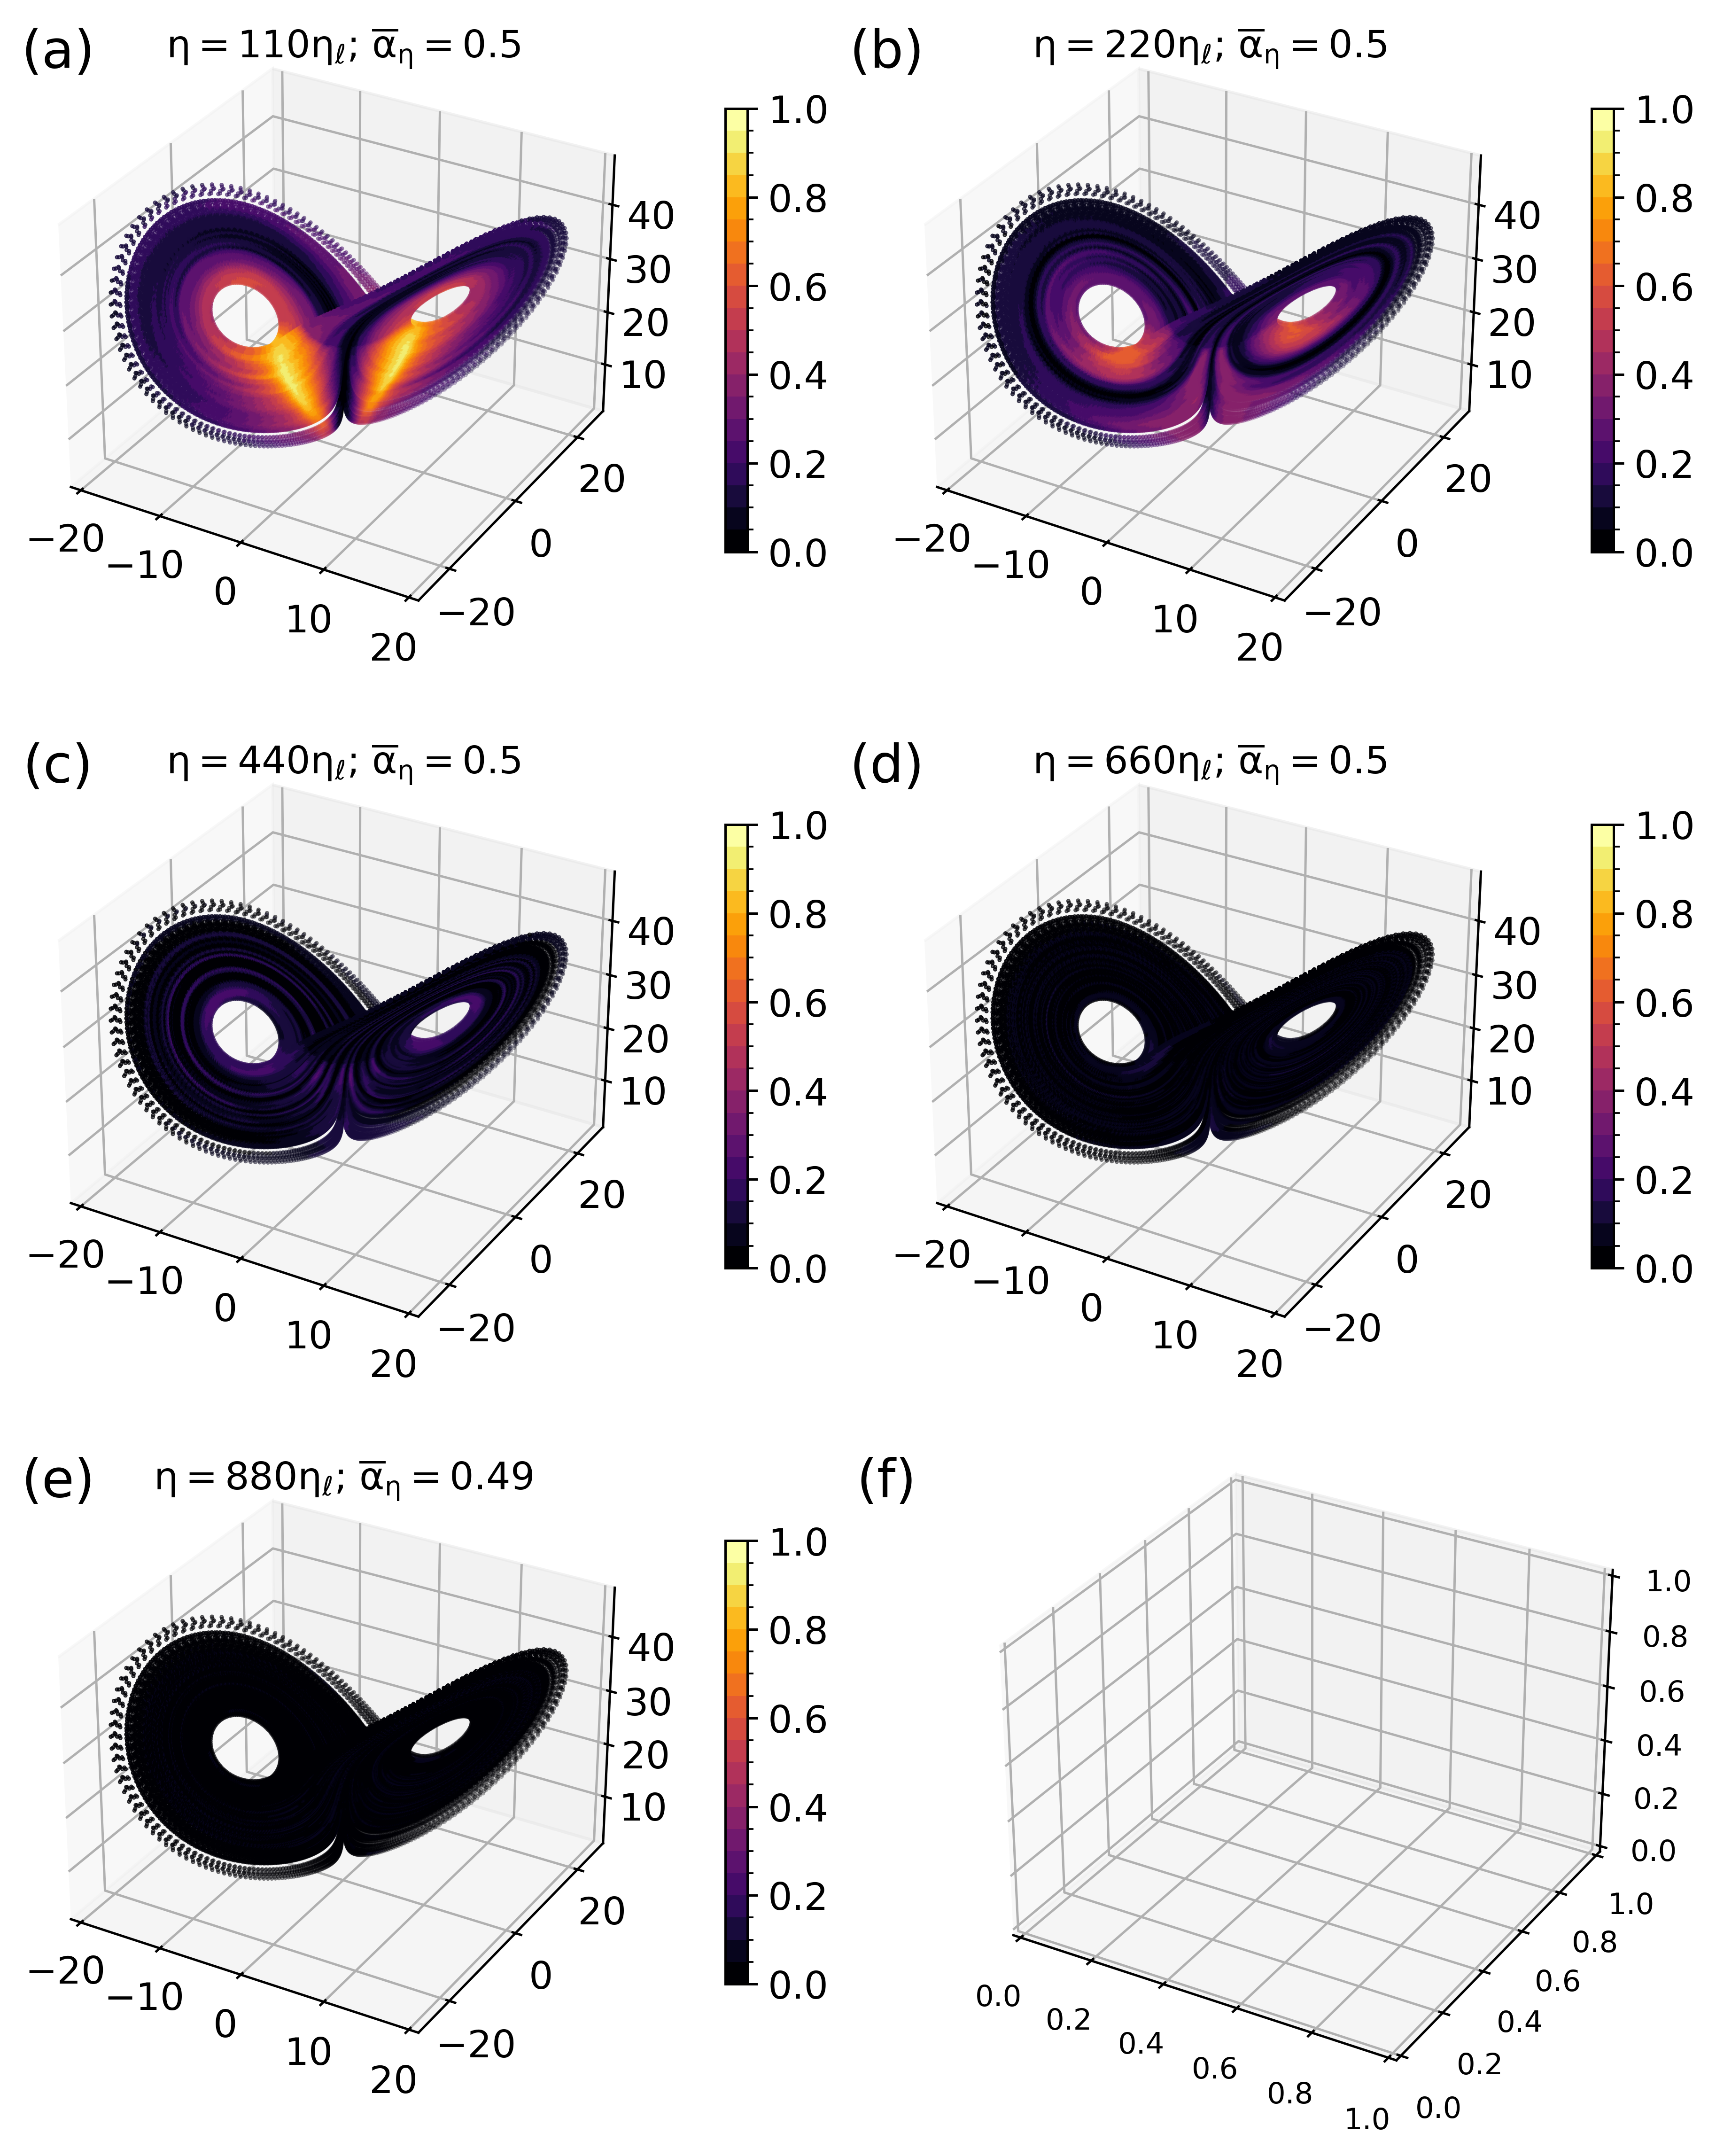

In [ ]:
# load data
Y = np.loadtxt('/home/TLR/data/datasets/lorenz_chaotic.txt')
t = Y[:,0]
X = Y[:,1:]

tau_list = np.array([110, 220, 440, 660, 880, 1760]) 

fig = plt.figure(figsize=(8, 10), dpi=450)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=0.05, hspace=0.05)
# Create three 3D axes
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322, projection='3d')
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324, projection='3d')
ax5 = fig.add_subplot(325, projection='3d')
ax6 = fig.add_subplot(326, projection='3d')  # Empty subplot for alignment
axes = [ax1, ax2, ax3, ax4, ax5]

# Key parameters, including the colormap
font_size = 13
cmap = plt.cm.inferno
colors = cmap(np.linspace(0, 1, 21))  
segmented_cmap = LinearSegmentedColormap.from_list("segmented_inferno", colors, N=20)

# Plot the attractor
for i, ax in enumerate(axes):
    
    end_idx = - (tau_list[i] - 1) if tau_list[i] != 1 else X.shape[0]
    im = ax.scatter(X[:-tau_list[i], 0], X[:-tau_list[i], 1], X[:-tau_list[i], 2], 
        c=ds_alpha['alphat'].sel(lag=tau_list[i]).values[:end_idx], s=0.2, cmap=segmented_cmap, vmin=0, vmax=1)
    ax.tick_params(labelsize=font_size, pad=0.08)
    ax.text(0, 0, X[:-tau_list[i], 2].max()*1.6, rf'$\mathdefault{{\eta = {tau_list[i]}\eta_\ell}}$; $\mathdefault{{\overline{{\alpha}}_\eta={np.round(alphat[:, i].mean(), 2)}}}$',
            fontsize=font_size, ha='center', va='center')
    cbar = ax.figure.colorbar(im, orientation='vertical', pad=0.1, shrink=0.65)
    cbar.ax.set_yticks(np.linspace(0, 1, 6))
    cbar.ax.set_yticks(np.linspace(0, 1, 21), minor=True)
    cbar.ax.tick_params(labelsize=font_size)

# Add index for each subfigure
a = 0.02
fig.text(a, 0.97, '(a)', ha='center', va='center', fontsize=font_size+5)
fig.text(0.49+a, 0.97, '(b)', ha='center', va='center', fontsize=font_size+5)
fig.text(a, 0.632, '(c)', ha='center', va='center', fontsize=font_size+5)
fig.text(0.49+a, 0.632, '(d)', ha='center', va='center', fontsize=font_size+5)
fig.text(a, 0.294, '(e)', ha='center', va='center', fontsize=font_size+5)
fig.text(0.49+a, 0.294, '(f)', ha='center', va='center', fontsize=font_size+5)
